In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model

# Análisis de percepción del usuario costo- calidad #

20.000 - 40.000 COP
40.000 - 60.000 COP
60.000 - 80.000 COP
80.000 - 100.000 COP
100.000 - 120.000 COP
120.000 - 140.000 COP
140.000 - 160.000 COP
160.000 - 180.000 COP
180.000 - 200.000 COP


NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<Figure size 432x288 with 0 Axes>

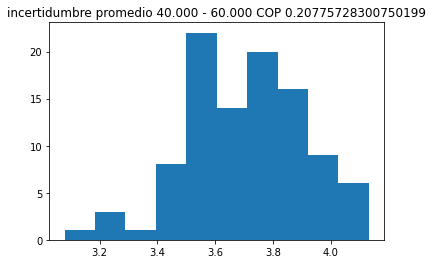

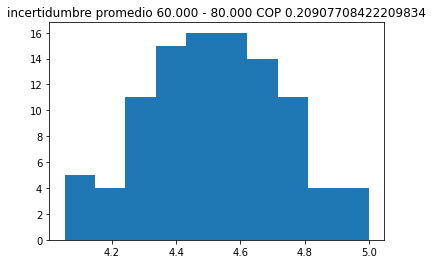

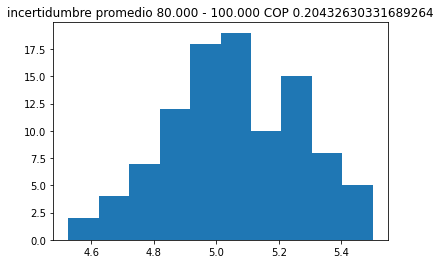

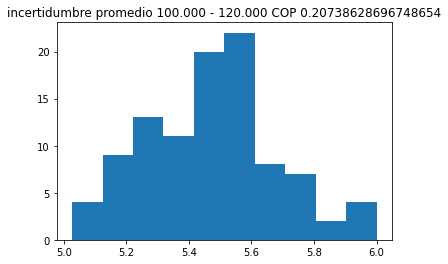

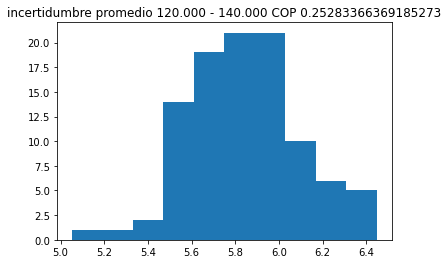

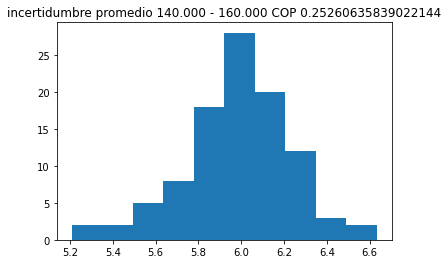

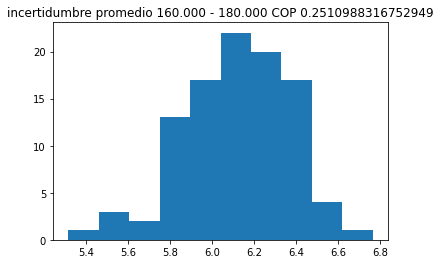

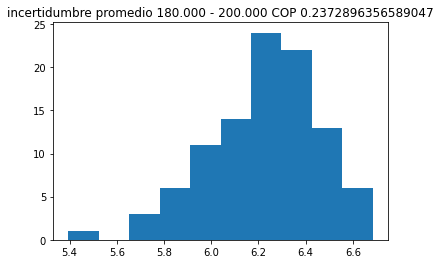

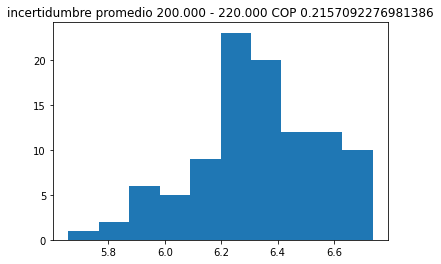

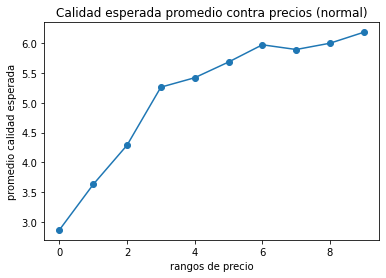

<Figure size 432x288 with 0 Axes>

In [51]:
df=pd.read_csv("encuesta.csv",delimiter="	",decimal=",")
q_spect=np.zeros(10)
xl=[]
arr_20000=np.array(df["Menos de 20.000 COP"])
mask=np.isnan(arr_20000) == False

q_spect[0]=arr_20000[mask].mean()
regresion = sklearn.linear_model.LinearRegression()
regresion.fit(np.arange(10).reshape(-1, 1), np.exp(q_spect)) 
plt.figure()
t=1
alfa=[]
beta=[]
for y in range(60):
    for i in range(9):
        arr_40000_20000=np.array(df[str(i*2+2)+"0.000 - "+str(i*2+4)+"0.000 COP"])
        print(str(i*2+2)+"0.000 - "+str(i*2+4)+"0.000 COP")
        mask=np.isnan(arr_40000_20000) == False
        coeficiente=[]

        parámetro=np.zeros(100)
        for p in range(100):
            g=np.random.choice(arr_40000_20000[mask], size=len(arr_40000_20000[mask]), replace=True, p=None)
            parámetro[i]=g.mean()
        plt.figure()
        plt.title("incertidumbre promedio "+str(t*2+2)+"0.000 - "+str(t*2+4)+"0.000 COP {}".format(parámetro.std()))
        plt.hist(parámetro)
        t=t+1
    regresion.fit(np.arange(10).reshape(-1, 1), np.exp(q_spect)) 
        
plt.figure()
plt.title("Calidad esperada promedio contra precios (normal)")
plt.scatter(np.arange(10),(q_spect))
plt.ylabel("promedio calidad esperada")
plt.xlabel("rangos de precio")
plt.plot(np.arange(10),(q_spect))

plt.figure()
regresion.fit(np.arange(10).reshape(-1, 1), np.exp(q_spect)) 
plt.title("Calidad esperada promedio contra precios (lineal) {}".format(regresion.score(np.arange(10).reshape(-1, 1), np.exp(q_spect))))
plt.scatter(np.arange(10),np.exp(q_spect))
plt.ylabel("promedio calidad esperada")
plt.xlabel("rangos de precio")
plt.plot(np.arange(10),np.arange(10)*regresion.coef_+ regresion.intercept_)
plt.figure(figsize=(14,10))


barx=[]
bary=[]
for i in ["Costura","Material","Precio","Prestigio de la marca", "Exclusividad en el diseño","Lugar de manufactura"]:
    dfm=np.array(df[i])
    barx.append(i)
    mask=np.isnan(dfm) == False
    bary.append(dfm[mask].sum())
plt.bar(barx,bary)
plt.xlabel("factor de compra")
plt.ylabel("relevancia del factor")



# Análisis experiencia costo-calidad #

# buena experiencia #

Text(0, 0.5, 'relevancia del factor')

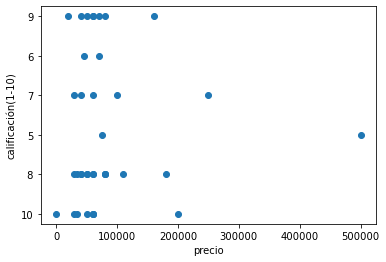

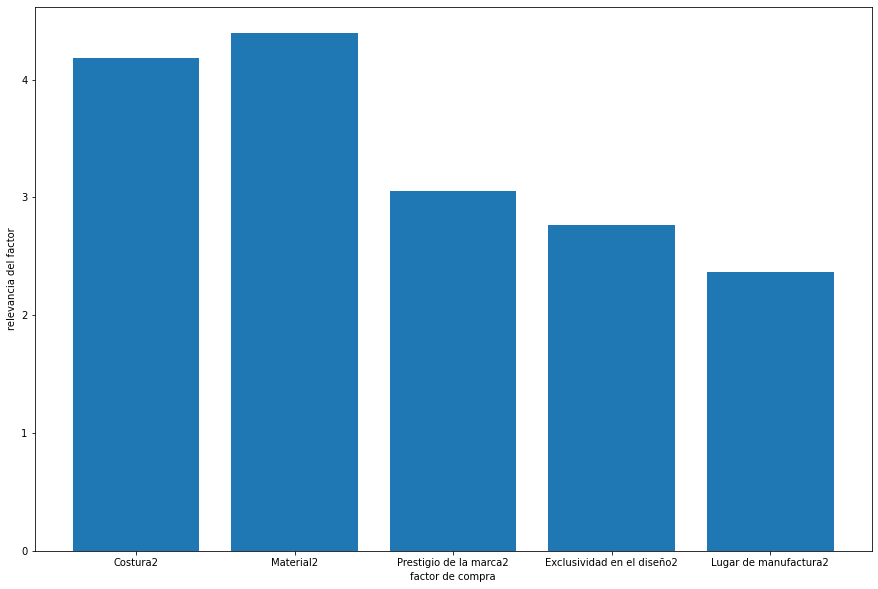

In [22]:
dfp=df["Inserte el precio de su prenda en pesos colombianos (sin puntos ni signo pesos)."]
dfp=df["Inserte el precio de su camisa en pesos colombianos (sin puntos ni signo pesos)."]
mask=np.isnan(dfp) == False
prices=dfp[mask]
dfur=df["califique su experiencia de 1 a 10 donde 1 es mala experiencia y 10 excelente experiencia."]

plt.figure()
userate=dfur[mask]
plt.xlabel("precio")
plt.ylabel("calificación(1-10)")
plt.scatter(prices,userate)
plt.figure(figsize=(15,10))
barx2=[]
bary2=[]

for i in ["Costura2","Material2","Prestigio de la marca2", "Exclusividad en el diseño2","Lugar de manufactura2"]:
    dfm=np.array(df[i])
    barx2.append(i)
    mask=np.isnan(dfm) == False
    bary2.append(dfm[mask].sum()/len(dfm[mask]))
plt.bar(barx2,bary2)
plt.xlabel("factor de compra")
plt.ylabel("relevancia del factor")

# mala experiencia #


Text(0, 0.5, 'relevancia del factor')

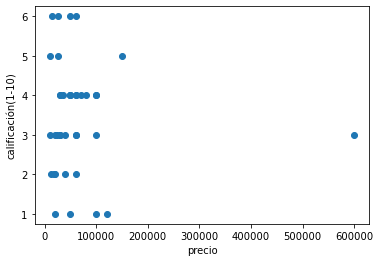

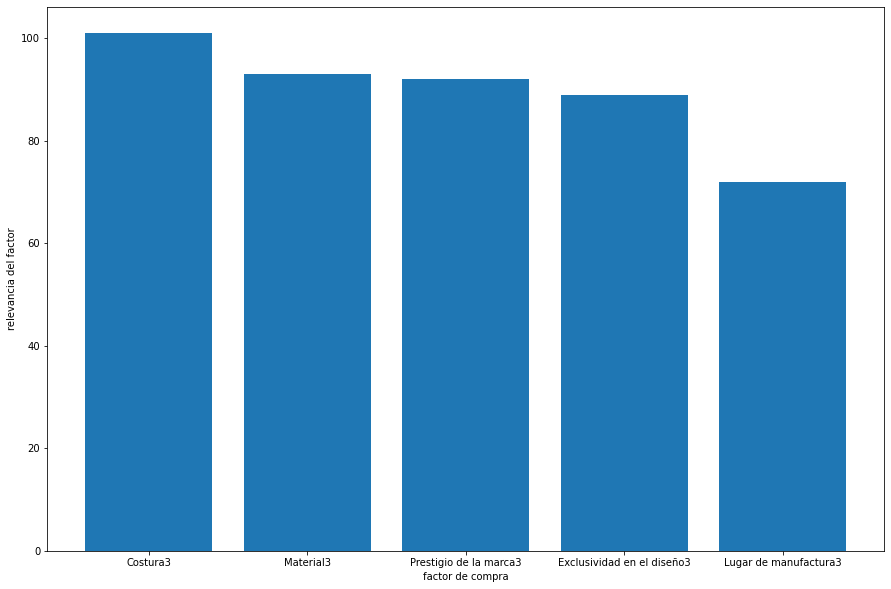

In [201]:
dfp=df["Inserte el precio de su camisa en pesos colombianos (sin puntos ni signo pesos)."]
mask=np.isnan(dfp) == False
prices=dfp[mask]
dfur=df["califique su experiencia de 1 a 10 donde 1 es mala experiencia y 10 excelente experiencia.2"]

userate=dfur[mask]
plt.xlabel("precio")
plt.ylabel("calificación(1-10)")
plt.scatter(prices,userate)
barx3=[]
bary3=[]
plt.figure(figsize=(15,10))
for i in ["Costura3","Material3","Prestigio de la marca3", "Exclusividad en el diseño3","Lugar de manufactura3"]:
    dfm=np.array(df[i])
    barx3.append(i)
    mask=np.isnan(dfm) == False
    bary3.append(dfm[mask].sum())
plt.bar(barx3,bary3)
plt.xlabel("factor de compra")
plt.ylabel("relevancia del factor")


# análisis precio-puntuación usuario linio #

Porcentaje de camisetas con califiación en linio
8.308308308308309


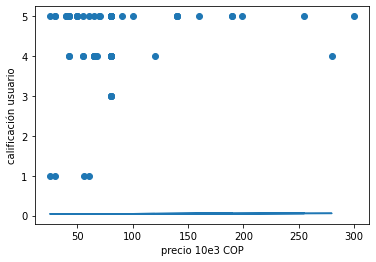

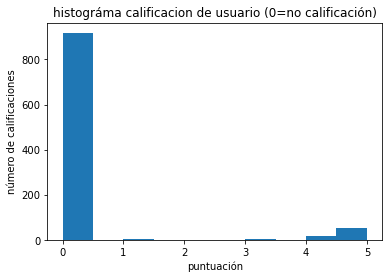

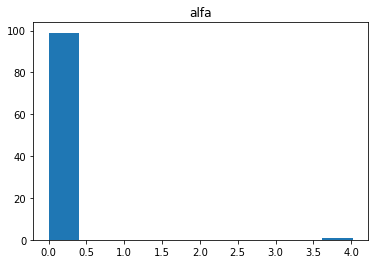

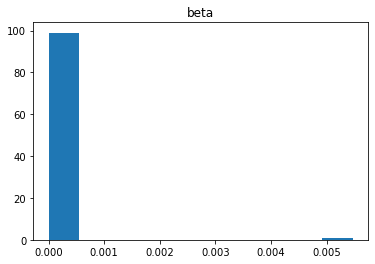

In [34]:
df1=pd.read_csv("precio_urate2.csv",decimal=".")

mask= df1["urate"] >0
price= np.array(df1["price"][mask])
urate=np.array(df1["urate"][mask])
alfa=np.zeros(100)
beta=np.zeros(100)
for i in range(1000):
    X_train, X_test, Y_train, Y_test  = sklearn.model_selection.train_test_split(price,urate, test_size=0.5)
    regresion_linio = sklearn.linear_model.LinearRegression()
    regresion_linio.fit(X_train.reshape(-1, 1), Y_train)
    alfa[0]=regresion_linio.intercept_
    beta[0]=regresion_linio.coef_
plt.scatter(price,urate)
plt.plot(X_test,X_test*beta.mean()+ alfa.mean())
plt.xlabel("precio 10e3 COP")
plt.ylabel("calificación usuario")
plt.figure()
plt.hist(df1["urate"])
plt.title("histográma calificacion de usuario (0=no calificación)")
plt.xlabel("puntuación")
plt.ylabel("número de calificaciones")
plt.figure()
plt.title("alfa")
plt.hist(alfa)
plt.figure()
plt.title("beta")
plt.hist(beta)
print("Porcentaje de camisetas con califiación en linio")
print(len(urate)/len(df1["urate"])*100)


In [ ]:
for i in range(10):
    (i*2+2)*1000(*2+4)